In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib widget

In [71]:
data = pd.read_csv('TTLCON.csv', index_col = 0, parse_dates = True)
data = data.iloc[:-13].copy()
train = data.copy()

In [72]:
data.tail()

,TTLCON
DATE,
2022-09-01,165491.0
2022-10-01,160203.0
2022-11-01,151954.0
2022-12-01,137579.0
2023-01-01,133247.0


## Standard ARIMA Forecast

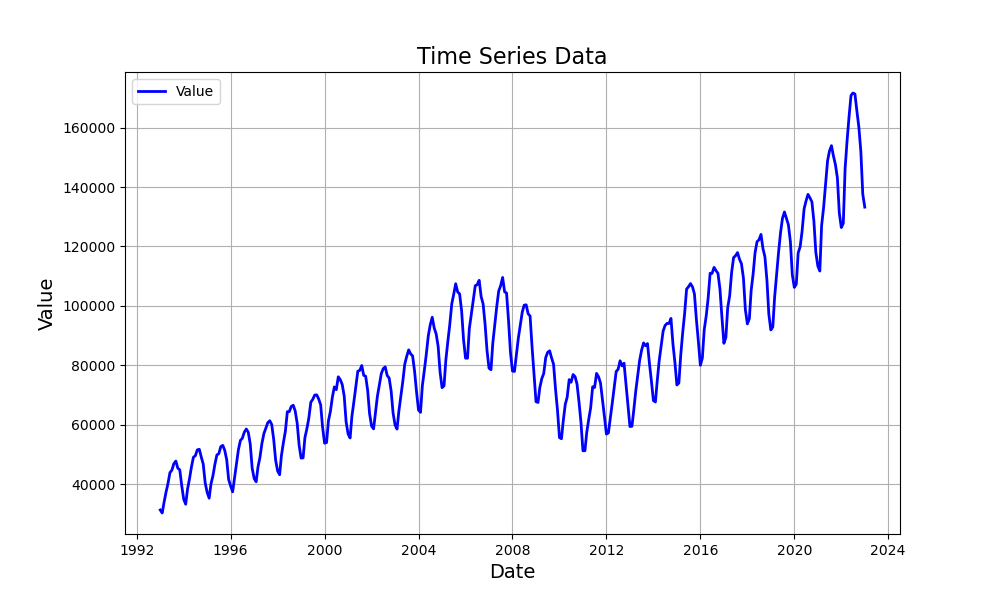

In [73]:
# Plotting
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.plot(data.index, data['TTLCON'], label='Value', color='blue', linewidth=2)

# Beautifying the plot
plt.title('Time Series Data', fontsize=16)  # Setting title
plt.xlabel('Date', fontsize=14)  # Setting x-axis label
plt.ylabel('Value', fontsize=14)  # Setting y-axis label
plt.grid(True)  # Adding grid
plt.legend()  # Adding legend

plt.show()

## Trend

In [74]:
import statsmodels.api as sm

In [75]:
#model=sm.tsa.statespace.SARIMAX(df['TTLCON'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
model=sm.tsa.statespace.SARIMAX(data['TTLCON'],order=(1, 0, 0))
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51496D+02    |proj g|=  2.82585D+02

At iterate    5    f=  1.15964D+01    |proj g|=  2.69999D+00

At iterate   10    f=  1.01070D+01    |proj g|=  1.12349D-01

At iterate   15    f=  9.99337D+00    |proj g|=  4.76096D-03

At iterate   20    f=  9.98479D+00    |proj g|=  1.63998D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     24      1     0     0   7.087D-06   9.985D+00
  F =   9.9845787332062574     

CONVERG

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


In [76]:
model=sm.tsa.statespace.SARIMAX(data['TTLCON'],order=(1, 0, 0))
results=model.fit()
preds_df = (results.get_forecast(steps = 12)
            .summary_frame(alpha=0.05))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51496D+02    |proj g|=  2.82585D+02

At iterate    5    f=  1.15964D+01    |proj g|=  2.69999D+00

At iterate   10    f=  1.01070D+01    |proj g|=  1.12349D-01

At iterate   15    f=  9.99337D+00    |proj g|=  4.76096D-03

At iterate   20    f=  9.98479D+00    |proj g|=  1.63998D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     24      1     0     0   7.087D-06   9.985D+00
  F =   9.9845787332062574     

CONVERG

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


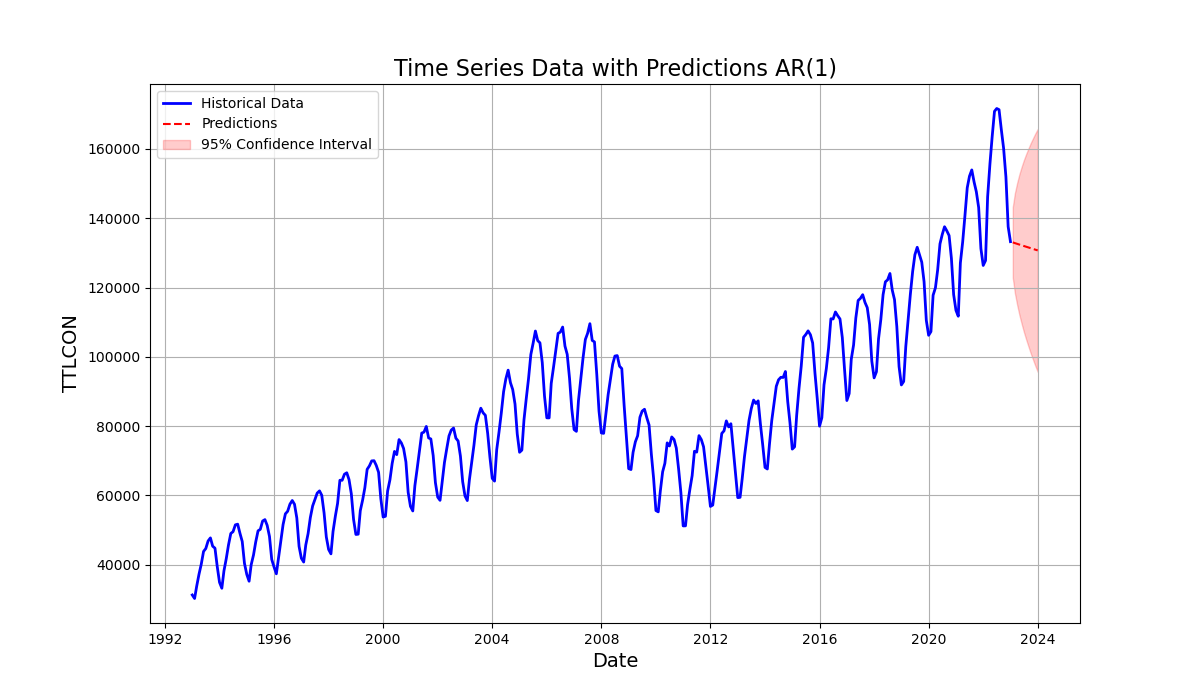

In [77]:
# Plotting the original data and the predictions with confidence intervals
plt.figure(figsize=(12, 7))

# Original data
plt.plot(data.index, data['TTLCON'], label='Historical Data', color='blue', linewidth=2)

# Predictions
plt.plot(preds_df.index, preds_df['mean'], label='Predictions', color='red', linestyle='--')

# Confidence intervals
plt.fill_between(preds_df.index, preds_df['mean_ci_lower'], preds_df['mean_ci_upper'], color='red', alpha=0.2, label='95% Confidence Interval')

# Beautifying the plot
plt.title('Time Series Data with Predictions AR(1)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('TTLCON', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()

In [78]:
model=sm.tsa.statespace.SARIMAX(data['TTLCON'],order=(1, 1, 0))
results=model.fit()
preds_df = (results.get_forecast(steps = 12)
            .summary_frame(alpha=0.05))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71282D+00    |proj g|=  4.81071D-02

At iterate    5    f=  9.70965D+00    |proj g|=  1.46724D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   1.467D-05   9.710D+00
  F =   9.7096463229349634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


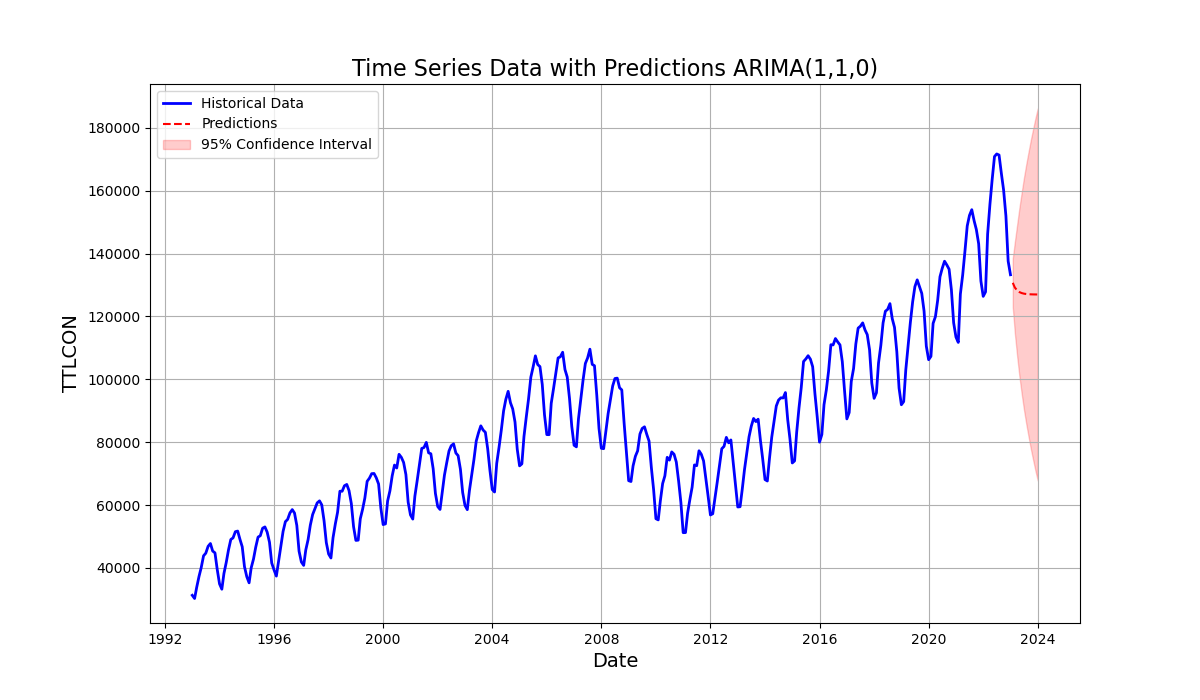

In [79]:
# Plotting the original data and the predictions with confidence intervals
plt.figure(figsize=(12, 7))

# Original data
plt.plot(data.index, data['TTLCON'], label='Historical Data', color='blue', linewidth=2)

# Predictions
plt.plot(preds_df.index, preds_df['mean'], label='Predictions', color='red', linestyle='--')

# Confidence intervals
plt.fill_between(preds_df.index, preds_df['mean_ci_lower'], preds_df['mean_ci_upper'], color='red', alpha=0.2, label='95% Confidence Interval')

# Beautifying the plot
plt.title('Time Series Data with Predictions ARIMA(1,1,0)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('TTLCON', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71260D+00    |proj g|=  4.81833D-02

At iterate    5    f=  9.70943D+00    |proj g|=  1.93142D-04

At iterate   10    f=  9.70942D+00    |proj g|=  3.08013D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   1.464D-05   9.709D+00
  F =   9.7094220377685172     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


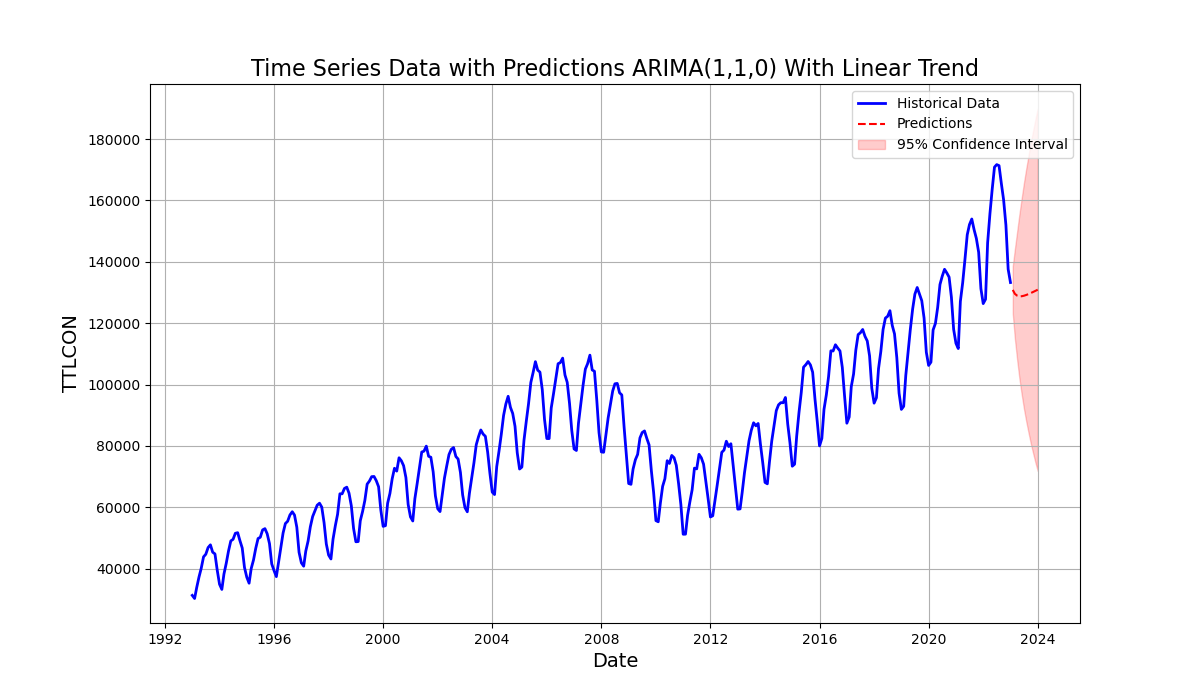

In [80]:
model=sm.tsa.statespace.SARIMAX(data['TTLCON'],order=(1, 1, 0), trend = 't')
results=model.fit()
preds_df = (results.get_forecast(steps = 12)
            .summary_frame(alpha=0.05))
# Plotting the original data and the predictions with confidence intervals
plt.figure(figsize=(12, 7))

# Original data
plt.plot(data.index, data['TTLCON'], label='Historical Data', color='blue', linewidth=2)

# Predictions
plt.plot(preds_df.index, preds_df['mean'], label='Predictions', color='red', linestyle='--')

# Confidence intervals
plt.fill_between(preds_df.index, preds_df['mean_ci_lower'], preds_df['mean_ci_upper'], color='red', alpha=0.2, label='95% Confidence Interval')

# Beautifying the plot
plt.title('Time Series Data with Predictions ARIMA(1,1,0) With Linear Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('TTLCON', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()

In [81]:
data['TTLCON'].index.freq = 'MS'

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71260D+00    |proj g|=  8.39521D-01

At iterate    5    f=  9.35667D+00    |proj g|=  2.79828D-03

At iterate   10    f=  9.35659D+00    |proj g|=  6.15991D-04

At iterate   15    f=  9.35655D+00    |proj g|=  3.46476D-04

At iterate   20    f=  9.35637D+00    |proj g|=  5.12424D-03

At iterate   25    f=  9.32298D+00    |proj g|=  9.81302D-02

At iterate   30    f=  9.10621D+00    |proj g|=  1.00828D-01

At iterate   35    f=  9.08994D+00    |proj g|=  2.66611D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

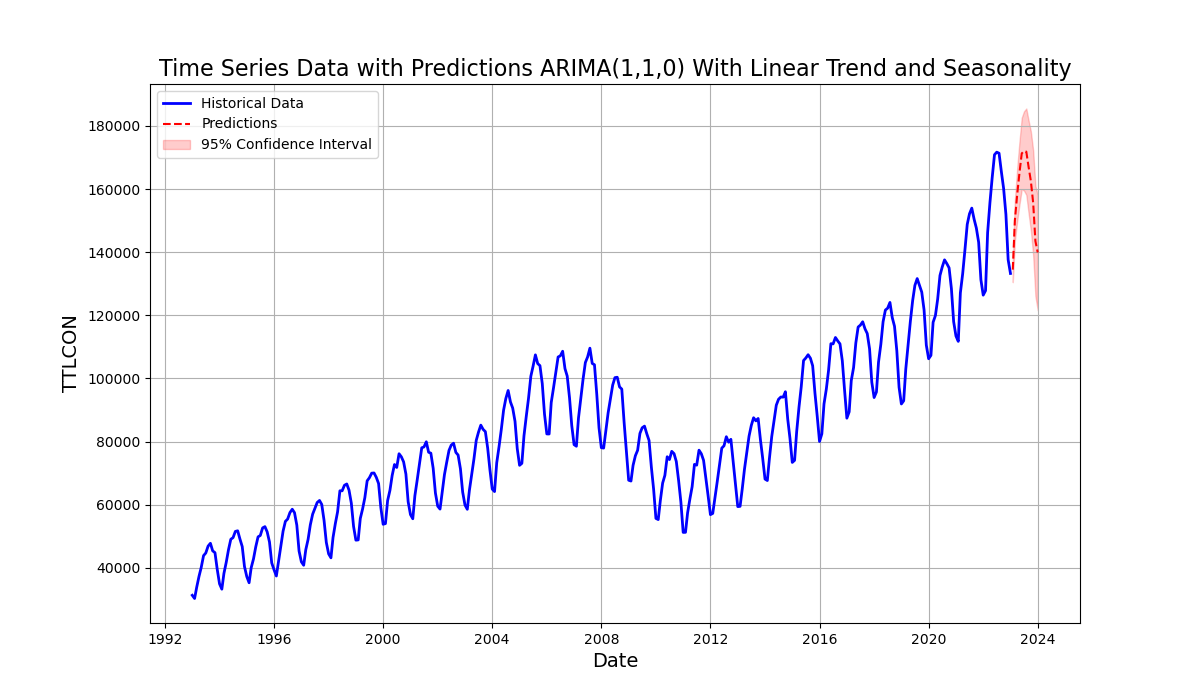

In [82]:
model=sm.tsa.statespace.SARIMAX(data['TTLCON'],order=(1, 1, 0), 
                                seasonal_order=(1, 0, 0, 12), trend = 't')
results=model.fit()
preds_df = (results.get_forecast(steps = 12)
            .summary_frame(alpha=0.05))
# Plotting the original data and the predictions with confidence intervals
plt.figure(figsize=(12, 7))

# Original data
plt.plot(data.index, data['TTLCON'], label='Historical Data', color='blue', linewidth=2)

# Predictions
plt.plot(preds_df.index, preds_df['mean'], label='Predictions', color='red', linestyle='--')

# Confidence intervals
plt.fill_between(preds_df.index, preds_df['mean_ci_lower'], preds_df['mean_ci_upper'], color='red', alpha=0.2, label='95% Confidence Interval')

# Beautifying the plot
plt.title('Time Series Data with Predictions ARIMA(1,1,0) With Linear Trend and Seasonality', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('TTLCON', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()

In [83]:
data['TTLCON']

DATE
1993-01-01     31283.0
1993-02-01     30264.0
1993-03-01     33794.0
1993-04-01     37257.0
1993-05-01     40124.0
                ...   
2022-09-01    165491.0
2022-10-01    160203.0
2022-11-01    151954.0
2022-12-01    137579.0
2023-01-01    133247.0
Freq: MS, Name: TTLCON, Length: 361, dtype: float64

## Machine Learning Example

In [84]:
# Add Target variable
data['Y'] = data['TTLCON'].shift(-1)

# add a seasonal lag
data['s_Y'] = data['TTLCON'].shift(12)

# Adding some features
data['change'] = data['TTLCON'].diff()
data['S_change'] = data['change'].shift(12) 

# Add in monthly dummies
# Extracting month from the DataFrame's index
data['Month'] = data.index.month

# Creating dummy variables for the months
month_dummies = pd.get_dummies(data['Month'], prefix='Month')

# Joining the dummy variables back to the original DataFrame
data_with_dummies = data.join(month_dummies)
data_with_dummies.drop('Month', axis = 1, inplace = True)

# Add in linear trend
data_with_dummies['t'] = np.arange(1, len(data)+1)
data_with_dummies['t2'] = np.arange(1, len(data)+1)**2
data_with_dummies.dropna(inplace = True)

In [85]:
Y = data_with_dummies['Y']
X = data_with_dummies.iloc[:,2:]

In [86]:
X

,s_Y,change,S_change,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,t,t2
DATE,,,,,,,,,,,,,,,,,
1994-02-01,30264.0,-1695.0,-1019.0,False,True,False,False,False,False,False,False,False,False,False,False,14,196
1994-03-01,33794.0,4993.0,3530.0,False,False,True,False,False,False,False,False,False,False,False,False,15,225
1994-04-01,37257.0,3539.0,3463.0,False,False,False,True,False,False,False,False,False,False,False,False,16,256
1994-05-01,40124.0,3957.0,2867.0,False,False,False,False,True,False,False,False,False,False,False,False,17,289
1994-06-01,43842.0,3321.0,3718.0,False,False,False,False,False,True,False,False,False,False,False,False,18,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,153944.0,-340.0,1816.0,False,False,False,False,False,False,False,True,False,False,False,False,356,126736
2022-09-01,150442.0,-5842.0,-3502.0,False,False,False,False,False,False,False,False,True,False,False,False,357,127449
2022-10-01,147631.0,-5288.0,-2811.0,False,False,False,False,False,False,False,False,False,True,False,False,358,128164


In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=500, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X, Y)

RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)

In [89]:
# store the alst value from the training set
last = Y.iloc[-1]

In [90]:
test = pd.read_csv('TTLCON.csv', index_col = 0, parse_dates = True)

In [91]:
# Add Target variable
test['Y'] = test['TTLCON'].shift(-1)

# add a seasonal lag
test['s_Y'] = test['TTLCON'].shift(12)

# Adding 
test['change'] = test['TTLCON'].diff()
test['S_change'] = test['change'].shift(12) 


# Add in monthly dummies
# Extracting month from the DataFrame's index
test['Month'] = test.index.month

# Creating dummy variables for the months
month_dummies = pd.get_dummies(test['Month'], prefix='Month')


# Joining the dummy variables back to the original DataFrame
data_with_dummies = test.join(month_dummies)
data_with_dummies.drop('Month', axis = 1, inplace = True)

# Add in linear trend
data_with_dummies['t'] = np.arange(1, len(test)+1)
data_with_dummies['t2'] = np.arange(1, len(test)+1)**2
data_with_dummies.dropna(inplace = True)

In [92]:
testframe = data_with_dummies.iloc[-13:].copy()

In [93]:
testframe

,TTLCON,Y,s_Y,change,S_change,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,t,t2
DATE,,,,,,,,,,,,,,,,,,,
2023-01-01,133247.0,133231.0,126378.0,-4332.0,-4882.0,True,False,False,False,False,False,False,False,False,False,False,False,361,130321
2023-02-01,133231.0,150245.0,127797.0,-16.0,1419.0,False,True,False,False,False,False,False,False,False,False,False,False,362,131044
2023-03-01,150245.0,156269.0,146168.0,17014.0,18371.0,False,False,True,False,False,False,False,False,False,False,False,False,363,131769
2023-04-01,156269.0,169350.0,155671.0,6024.0,9503.0,False,False,False,True,False,False,False,False,False,False,False,False,364,132496
2023-05-01,169350.0,178192.0,163570.0,13081.0,7899.0,False,False,False,False,True,False,False,False,False,False,False,False,365,133225
2023-06-01,178192.0,180008.0,170859.0,8842.0,7289.0,False,False,False,False,False,True,False,False,False,False,False,False,366,133956
2023-07-01,180008.0,186122.0,171673.0,1816.0,814.0,False,False,False,False,False,False,True,False,False,False,False,False,367,134689
2023-08-01,186122.0,181123.0,171333.0,6114.0,-340.0,False,False,False,False,False,False,False,True,False,False,False,False,368,135424
2023-09-01,181123.0,181226.0,165491.0,-4999.0,-5842.0,False,False,False,False,False,False,False,False,True,False,False,False,369,136161


In [94]:
X_test = testframe.iloc[:,2:].copy()

In [95]:
# recursrive forecast
predictions = []
X_test = testframe.iloc[:,2:]
for i in range(len(X_test)-1):
    prediction = regressor.predict(X_test.iloc[i:i+1])
    change = prediction - last
    last = prediction
    X_test.loc[X_test.index[i+1], 'change'] = change
    testframe.loc[X_test.index[i+1], 'prediction'] = last

In [96]:
testframe.head()

,TTLCON,Y,s_Y,change,S_change,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,t,t2,prediction
DATE,,,,,,,,,,,,,,,,,,,,
2023-01-01,133247.0,133231.0,126378.0,-4332.0,-4882.0,True,False,False,False,False,False,False,False,False,False,False,False,361,130321,NaN
2023-02-01,133231.0,150245.0,127797.0,-16.0,1419.0,False,True,False,False,False,False,False,False,False,False,False,False,362,131044,136538.326
2023-03-01,150245.0,156269.0,146168.0,17014.0,18371.0,False,False,True,False,False,False,False,False,False,False,False,False,363,131769,145213.574
2023-04-01,156269.0,169350.0,155671.0,6024.0,9503.0,False,False,False,True,False,False,False,False,False,False,False,False,364,132496,161852.064
2023-05-01,169350.0,178192.0,163570.0,13081.0,7899.0,False,False,False,False,True,False,False,False,False,False,False,False,365,133225,164131.282


In [97]:
X_test.head()

,s_Y,change,S_change,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,t,t2
DATE,,,,,,,,,,,,,,,,,
2023-01-01,126378.0,-4332.000,-4882.0,True,False,False,False,False,False,False,False,False,False,False,False,361,130321
2023-02-01,127797.0,3291.326,1419.0,False,True,False,False,False,False,False,False,False,False,False,False,362,131044
2023-03-01,146168.0,8675.248,18371.0,False,False,True,False,False,False,False,False,False,False,False,False,363,131769
2023-04-01,155671.0,16638.490,9503.0,False,False,False,True,False,False,False,False,False,False,False,False,364,132496
2023-05-01,163570.0,2279.218,7899.0,False,False,False,False,True,False,False,False,False,False,False,False,365,133225


In [98]:
data = pd.read_csv('TTLCON.csv', index_col = 0, parse_dates = True)

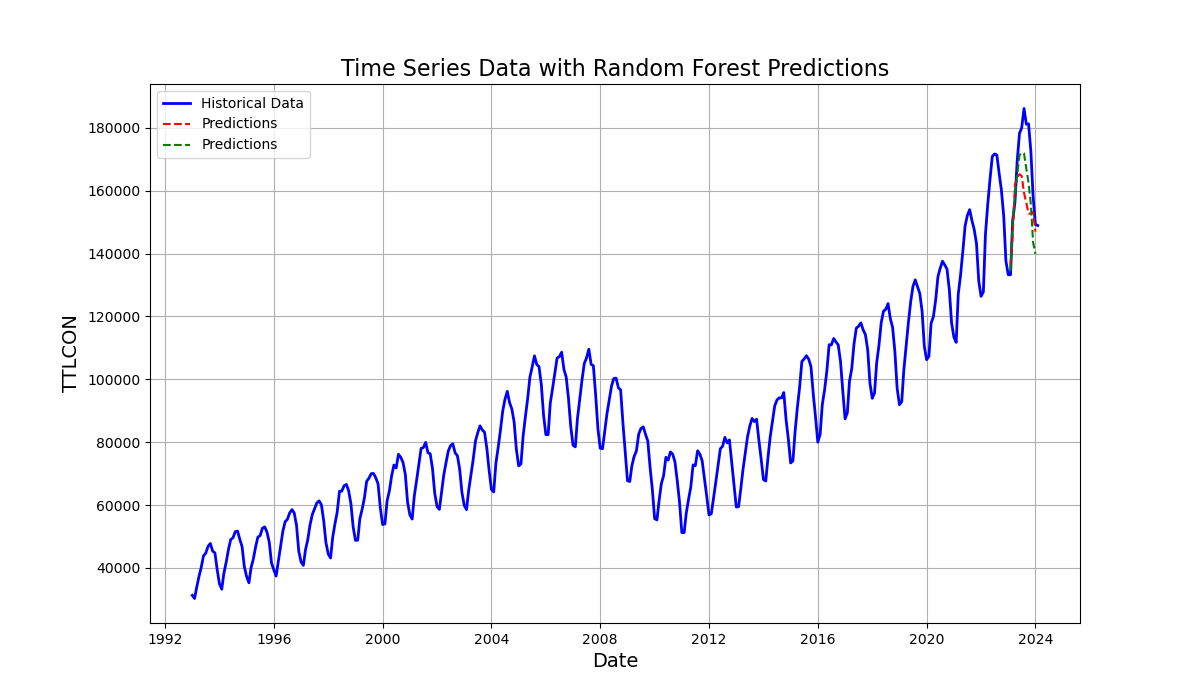

In [99]:
# Plotting the original data and the predictions with confidence intervals
plt.figure(figsize=(12, 7))

# Original data
plt.plot(data.index, data['TTLCON'], label='Historical Data', color='blue', linewidth=2)

# Predictions
plt.plot(testframe.index, testframe['prediction'], label='Predictions', color='red', linestyle='--')
#plt.plot(preds_df.index, preds_df['mean'], label='Predictions', color='green', linestyle='--')


# Confidence intervals
#plt.fill_between(preds_df.index, preds_df['mean_ci_lower'], preds_df['mean_ci_upper'], color='red', alpha=0.2, label='95% Confidence Interval')

# Beautifying the plot
plt.title('Time Series Data with Random Forest Predictions', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('TTLCON', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()